In [39]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
%autoreload 2

In [46]:
from train import load_data
from utils import get_device
import torch
import vae
from vae import train_vae

In [48]:
train_iter, valid_iter = load_data()
num_epochs = 20
x_dim = 28 * 28
# MNIST is 28 x 28
encoder_hidden_layers = [512, 384, 256]
decoder_hidden_layers = [256, 384, 512]
latent_dim = 128

encoder = vae.MLPEncoder(encoder_hidden_layers, latent_dim)
decoder = vae.MLPDecoder(decoder_hidden_layers, x_dim)

lr = 0.0001
net = vae.VAE(encoder, decoder, device=get_device())

device = get_device()
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr)
train_vae(net, optimizer, train_iter, valid_iter, num_epochs)

/home/darren/.local/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 - Train Loss: 75.49409840332031
Epoch 0 - Valid Loss: 52.26383590698242
Epoch 1 - Train Loss: 52.024669033203125
Epoch 1 - Valid Loss: 51.64411544799805
Epoch 2 - Train Loss: 50.799415629882816
Epoch 2 - Valid Loss: 50.285484313964844
Epoch 3 - Train Loss: 50.06021616210938
Epoch 3 - Valid Loss: 49.856956481933594
Epoch 4 - Train Loss: 49.612226923828125
Epoch 4 - Valid Loss: 49.52229309082031
Epoch 5 - Train Loss: 49.101342885742184
Epoch 5 - Valid Loss: 48.78132247924805
Epoch 6 - Train Loss: 48.41723049804688
Epoch 6 - Valid Loss: 48.13587951660156
Epoch 7 - Train Loss: 47.85803772949219
Epoch 7 - Valid Loss: 47.703914642333984
Epoch 8 - Train Loss: 47.332705908203124
Epoch 8 - Valid Loss: 47.175498962402344
Epoch 9 - Train Loss: 46.861578349609374
Epoch 9 - Valid Loss: 46.804325103759766
Epoch 10 - Train Loss: 46.412071147460935
Epoch 10 - Valid Loss: 46.34539794921875
Epoch 11 - Train Loss: 46.050322373046875
Epoch 11 - Valid Loss: 45.93124771118164
Epoch 12 - Train Loss: 

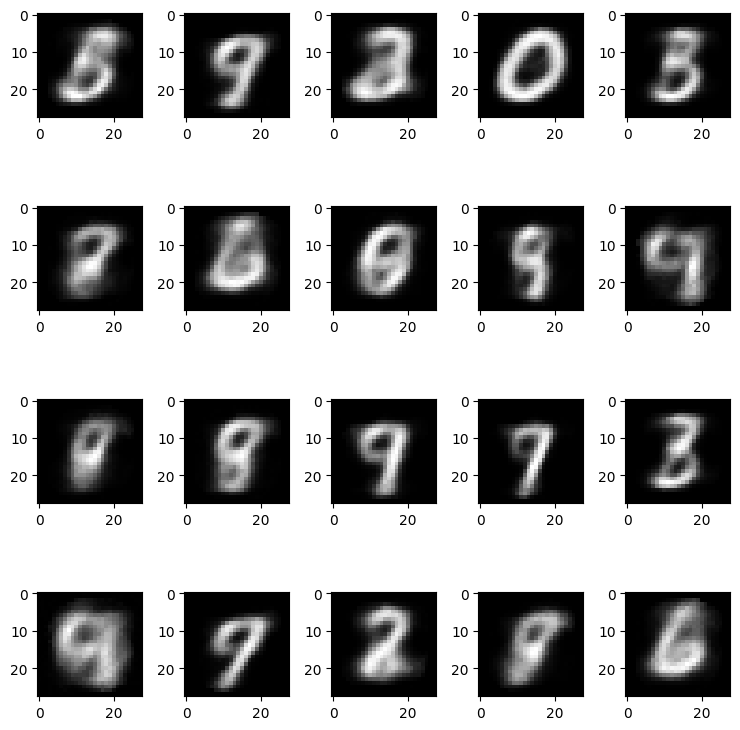

In [50]:
from train import visualize_out
count = 20
z = torch.randn((count, latent_dim), device=get_device())
out = net.decoder(z)

imgs = out.reshape((count, 28, 28)).cpu().detach().numpy()
visualize_out(imgs)

In [65]:
import cvae
from cvae import train_cvae
cvae_encoder = cvae.ConditionalMLPEncoder(encoder_hidden_layers, latent_dim)
cvae_decoder = cvae.ConditionalMLPDecoder(decoder_hidden_layers, x_dim)
num_epochs = 20
net = cvae.CVAE(cvae_encoder, cvae_decoder)
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr)
train_cvae(net, optimizer, train_iter, valid_iter, num_epochs)

/home/darren/.local/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 0 - Train Loss: 76.5283040283203
Epoch 0 - Valid Loss: 52.277259826660156
Epoch 1 - Train Loss: 51.98510266601563
Epoch 1 - Valid Loss: 51.45034408569336
Epoch 2 - Train Loss: 50.565131923828126
Epoch 2 - Valid Loss: 50.029869079589844
Epoch 3 - Train Loss: 49.55255083984375
Epoch 3 - Valid Loss: 48.918678283691406
Epoch 4 - Train Loss: 47.877308901367186
Epoch 4 - Valid Loss: 47.243160247802734
Epoch 5 - Train Loss: 46.671011499023436
Epoch 5 - Valid Loss: 45.99860763549805
Epoch 6 - Train Loss: 44.77352933105469
Epoch 6 - Valid Loss: 43.91147232055664
Epoch 7 - Train Loss: 43.203107778320316
Epoch 7 - Valid Loss: 42.70944595336914
Epoch 8 - Train Loss: 42.10979717773437
Epoch 8 - Valid Loss: 41.688194274902344
Epoch 9 - Train Loss: 41.085497006835936
Epoch 9 - Valid Loss: 40.56422424316406
Epoch 10 - Train Loss: 39.97915546386719
Epoch 10 - Valid Loss: 39.52690505981445
Epoch 11 - Train Loss: 39.00381255371094
Epoch 11 - Valid Loss: 38.543296813964844
Epoch 12 - Train Loss: 38.

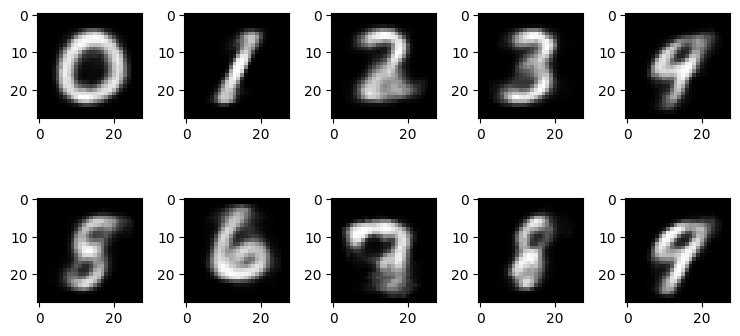

In [69]:
from train import visualize_out
count = 10
z = torch.randn((count, latent_dim), device=get_device())
cond = torch.nn.functional.one_hot(torch.tensor(range(count)), 10).to(get_device())
out = net.decoder(z, cond)

imgs = out.reshape((count, 28, 28)).cpu().detach().numpy()
visualize_out(imgs)